<a href="https://colab.research.google.com/github/HegiaSitepu/1320123006-data-mining/blob/main/Tugas_3_Preprocessing_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. LOAD DATASET
Shape awal data: (891, 12)
Preview data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S 

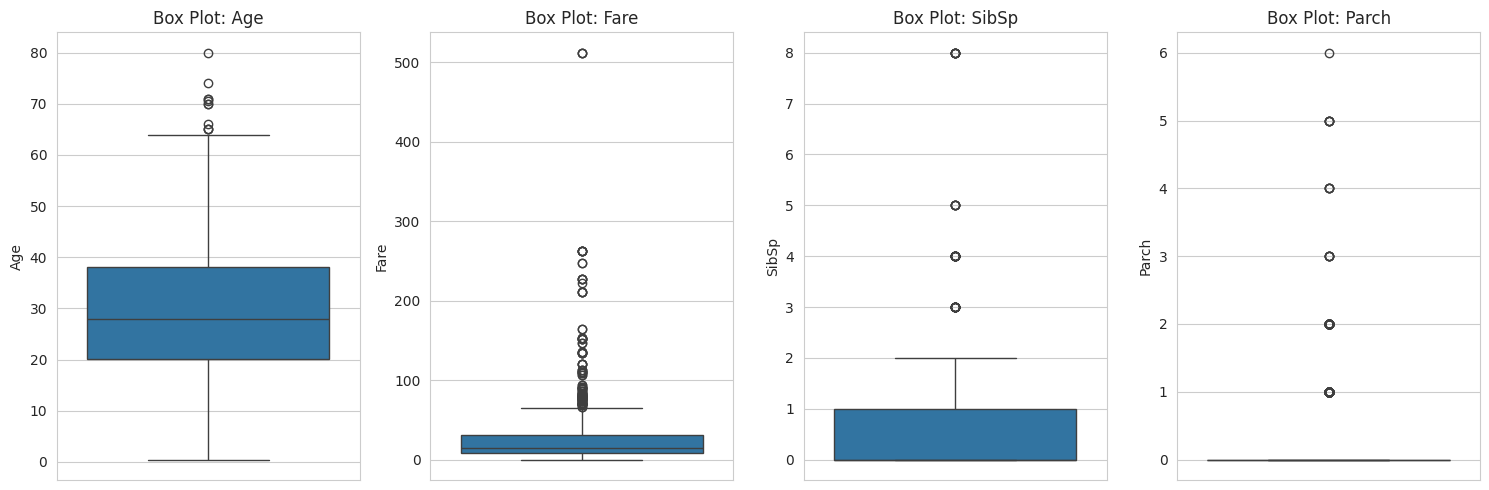


C. Distribusi Variabel Numerik:


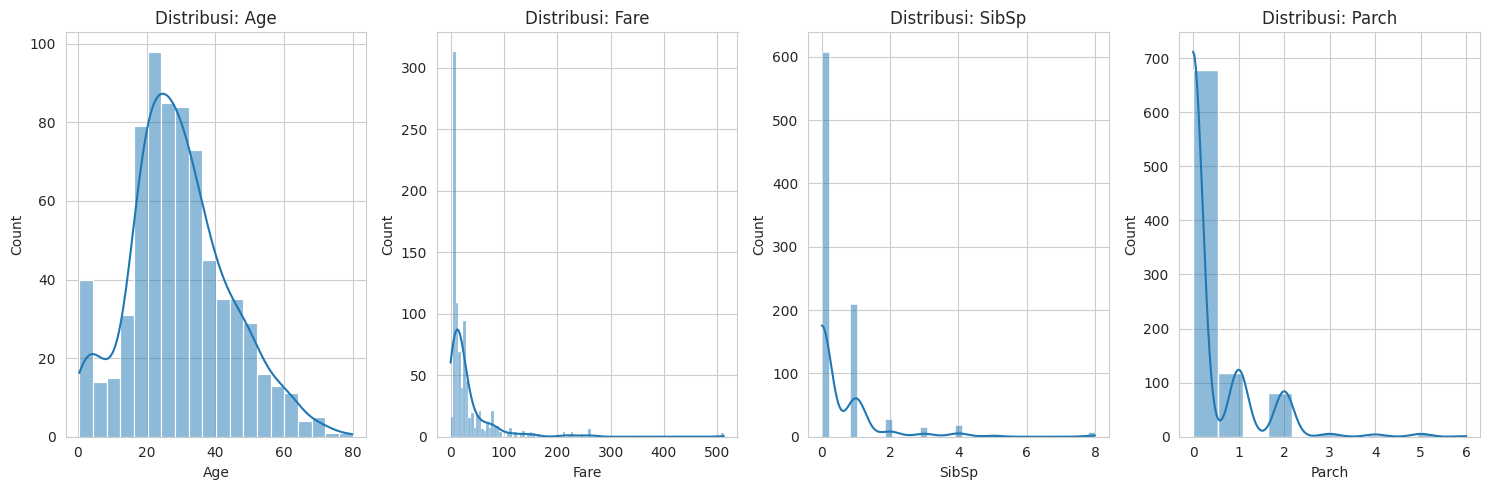


3. HANDLING MISSING VALUES
-> Age diimputasi dengan Median.
-> Kolom Cabin dihapus.


ValueError: 2

In [2]:
# ==============================================================================
# TUGAS PRAKTIKUM DATA PREPROCESSING - DATASET TITANIC
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Set style untuk visualisasi
sns.set_style("whitegrid")
# ==============================================================================
# 1. LOAD DATASET
# ==============================================================================
print("1. LOAD DATASET")
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Shape awal data:", df.shape)
print("Preview data:")
print(df.head())

# ==============================================================================
# 2. EKSPLORASI DATA LENGKAP
# ==============================================================================
print("\n" + "="*50)
print("2. EKSPLORASI DATA LENGKAP")
print("="*50)

# A. Info Dataset & Missing Values
print("\nA. Info Dataset dan Missing Values Awal:")
df.info()
print("\nTotal Missing Values per Kolom:")
print(df.isnull().sum())

# B. Deteksi Outliers (Visualisasi Box Plot)
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
print("\nB. Visualisasi Outliers pada Variabel Numerik:")

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot: {col}')
plt.tight_layout()
plt.show()

# C. Distribusi Data (Visualisasi Histogram)
print("\nC. Distribusi Variabel Numerik:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

# ==============================================================================
# 3. HANDLING MISSING VALUES (Minimal 3 Teknik Berbeda)
# ==============================================================================
print("\n" + "="*50)
print("3. HANDLING MISSING VALUES")
print("="*50)

# Teknik 1: Imputasi dengan Median (untuk Age)
# Alasan: Age memiliki sedikit outliers (terlihat di Box Plot), Median lebih robust.
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])
print("-> Age diimputasi dengan Median.")

# Teknik 2: Hapus Kolom (untuk Cabin)
# Alasan: Terlalu banyak missing values (~77%), imputasi akan terlalu bias.
df = df.drop('Cabin', axis=1)
print("-> Kolom Cabin dihapus.")

# Teknik 3: Imputasi dengan Modus (untuk Embarked)
# Alasan: Variabel kategorikal dengan missing values yang sangat sedikit.
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']])
print("-> Embarked diimputasi dengan Modus.")

# Cek kembali missing values
print("\nMissing values setelah handling:")
print(df.isnull().sum())

# ==============================================================================
# 4. DETEKSI & TANGANI OUTLIERS (Minimal 2 Variabel Numerik)
# ==============================================================================
print("\n" + "="*50)
print("4. DETEKSI & TANGANI OUTLIERS (Capping - IQR Method)")
print("="*50)

# A. Variabel 1: Fare (Hanya Capping Batas Atas karena distribusi sangat miring ke kanan)
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
upper_limit_fare = Q3_fare + 1.5 * IQR_fare

# Terapkan Capping
df['Fare_capped'] = np.where(df['Fare'] > upper_limit_fare, upper_limit_fare, df['Fare'])
print(f"-> Fare: Outliers diatasi dengan Capping di batas atas: {upper_limit_fare:.2f}.")

# B. Variabel 2: Age (Capping Batas Atas dan Bawah)
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_limit_age = Q1_age - 1.5 * IQR_age
upper_limit_age = Q3_age + 1.5 * IQR_age

# Terapkan Capping
# Pastikan batas bawah tidak negatif (usia tidak mungkin negatif)
lower_limit_age = max(0, lower_limit_age)

df['Age_capped'] = np.where(df['Age'] > upper_limit_age, upper_limit_age, df['Age'])
df['Age_capped'] = np.where(df['Age_capped'] < lower_limit_age, lower_limit_age, df['Age_capped'])
print(f"-> Age: Outliers diatasi dengan Capping (Batas Bawah: {lower_limit_age:.2f}, Batas Atas: {upper_limit_age:.2f}).")


# Cek distribusi Fare setelah capping
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Fare'])
plt.title('Fare (Sebelum Capping)')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare_capped'])
plt.title('Fare (Setelah Capping)')
plt.tight_layout()
plt.show()

# ==============================================================================
# 5. ENCODING CATEGORICAL VARIABLES
# ==============================================================================
print("\n" + "="*50)
print("5. ENCODING CATEGORICAL VARIABLES")
print("="*50)

# A. Sex: Label Encoding (Variabel Biner)
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print("-> Sex di-encode dengan Label Encoding (0=female, 1=male).")

# B. Embarked: One-Hot Encoding (Variabel Nominal)
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])
print("-> Embarked di-encode dengan One-Hot Encoding.")

# C. Pclass: Dibiarkan (Variabel Ordinal, sudah berupa angka)
print("-> Pclass dipertahankan sebagai numerik/ordinal.")

# Hapus kolom asli yang sudah di-encode/dicapped
df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Fare', 'Age'], axis=1)

# ==============================================================================
# 6. RINGKASAN DATA AKHIR
# ==============================================================================
print("\n" + "="*50)
print("6. RINGKASAN DATA AKHIR")
print("="*50)
print("\nInfo Dataframe Akhir Setelah Preprocessing:")
df_processed.info()
print("\nPreview 5 Baris Dataframe Akhir:")
print(df_processed.head())

# ==============================================================================
# 7. LAPORAN KEPUTUSAN PREPROCESSING
# ==============================================================================
print("\n" + "="*50)
print("7. LAPORAN KEPUTUSAN PREPROCESSING")
print("="*50)
print("""
LAPORAN KEPUTUSAN DATA PREPROCESSING DATASET TITANIC

1. Handling Missing Values (3 Teknik Berbeda):
   - Age: Menggunakan **Imputasi Median**. Dipilih karena distribusi Age sedikit miring dan Median lebih tahan terhadap outliers dibandingkan Mean.
   - Cabin: **Kolom Dihapus**. Diputuskan karena memiliki missing values yang sangat banyak (~77%), yang akan menyebabkan bias besar jika diimputasi.
   - Embarked: Menggunakan **Imputasi Modus**. Variabel kategorikal dengan hanya 2 missing values; Modus adalah cara paling aman untuk mempertahankan distribusi kategorinya.

2. Outlier Treatment (2 Variabel Numerik):
   - Fare: Menggunakan **Capping (IQR Method)** pada batas atas ($Q3 + 1.5 \times IQR$). Tujuannya adalah mengurangi dampak tiket yang sangat mahal (outliers) tanpa menghapus data penting.
   - Age: Menggunakan **Capping (IQR Method)** pada batas atas dan batas bawah. Ini dilakukan untuk menstabilkan model dari usia yang ekstrem (sangat tua atau sangat muda).

3. Encoding Kategorikal:
   - Sex: **Label Encoding** (0/1). Variabel biner yang efisien untuk di-encode.
   - Embarked: **One-Hot Encoding**. Variabel nominal (tidak berurutan), sehingga One-Hot Encoding mencegah model salah menginterpretasikan angka sebagai urutan.
   - Pclass: Dipertahankan sebagai numerik karena menyiratkan urutan (ordinal) kelas tiket.
""")